# UCI Coronary Heart Disease Prediction Model

In [1]:
import pandas as pd
df = pd.read_csv("heart.csv")

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
X = df[['trestbps','chol','thalach']]
y = df["target"]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [7]:
from sklearn import linear_model
log_regr = linear_model.LogisticRegression(max_iter = 1000)
log_regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
log_regr.score(X_test, y_test)

0.6923076923076923

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve, roc_auc_score


In [13]:
from sklearn.model_selection import cross_val_score 

k = 10

#SVM 
clf = SVC(kernel='sigmoid', probability=True)
clf.fit(X_train, y_train)
svc_acc = clf.score(X_test, y_test)*100
scores = cross_val_score(clf, X, y, cv=k) 
svc_crossval = round(scores.mean()*100, 4)

#KNN
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train, y_train)
knn_acc = knn_classifier.score(X_test, y_test)*100
scores = cross_val_score(knn_classifier, X, y, cv=k)
knn_crossval = round(scores.mean()*100, 2)

#Decision Tree
dt_classifier = DecisionTreeClassifier(max_features = 2)
dt_classifier.fit(X_train, y_train)
dt_acc = dt_classifier.score(X_test, y_test)*100
scores = cross_val_score(dt_classifier, X, y, cv=k) 
dt_crossval =round(scores.mean()*100, 2)

#Random Forest
rf_classifier = RandomForestClassifier(n_estimators =500)
rf_classifier.fit(X_train, y_train)
rf_acc = rf_classifier.score(X_test, y_test)*100
scores = cross_val_score(rf_classifier, X, y, cv=k) 
rf_crossval = round(scores.mean()*100, 2)

#Logistic Regression
logreg = LogisticRegression().fit(X_train, y_train)
lr_acc = logreg.score(X_test, y_test)*100
scores = cross_val_score(logreg, X, y, cv=k) 
lr_crossval = round(scores.mean()*100, 2)

#Gausian Naive Bayes
gnb = GaussianNB().fit(X_train, y_train)
GNB_acc = gnb.score(X_test, y_test)*100
scores = cross_val_score(gnb, X, y, cv=k) 
GNB_crossval = round(scores.mean()*100, 2)

# xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
# xgb_model.fit(X_train, y_train)
# xgb_acc = xgb.score(X_test, y_test)*100
# scores = cross_val_score(xgb_model, X, y, cv=k) 
# XGB_crossval = round(scores.mean()*100, 2)


#Ensemble Methods
#Bagged SVM
model = BaggingClassifier(base_estimator=SVC(kernel='sigmoid'),
                         n_estimators=1000).fit(X_train, y_train)
BSVM_acc = model.score(X_test,y_test)*100
results = model_selection.cross_val_score(model, X, y, cv=k)
BSVM_crossval = round(results.mean()*100, 2)

# Extra Trees
model = ExtraTreesClassifier(n_estimators=1000)
ET_acc = model.fit(X_train,y_train).score(X_test,y_test)*100
results = model_selection.cross_val_score(model, X, y, cv=k)
ET_crossval = round(results.mean()*100, 2)

#Boosting
# AdaBoost Classification
model = AdaBoostClassifier(n_estimators=1000)
AB_acc = model.fit(X_train,y_train).score(X_test,y_test)*100
results = model_selection.cross_val_score(model, X, y, cv=k)
AB_crossval = round(results.mean()*100, 2)

#Stochastic Gradient Boosting
model = GradientBoostingClassifier(n_estimators=1000)
SGB_acc = model.fit(X_train,y_train).score(X_test,y_test)*100
results = model_selection.cross_val_score(model, X, y, cv=k)
SGB_crossval = round(results.mean()*100, 2)


#Voting Ensemble
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC(probability=True)
estimators.append(('svm', model3))
model4 = KNeighborsClassifier(n_neighbors=5)
estimators.append(('knn', model4))
model5 = RandomForestClassifier()
estimators.append(('rf', model5))

ensemble = VotingClassifier(estimators)
VC_acc = ensemble.fit(X_train,y_train).score(X_test,y_test)*100
results = model_selection.cross_val_score(ensemble, X, y, cv=k)
VC_crossval = round(results.mean()*100, 2)



## ROC
classifiers = [
               SVC(kernel='sigmoid', probability=True),
               KNeighborsClassifier(n_neighbors=5), 
               DecisionTreeClassifier(),
                RandomForestClassifier(n_estimators =500),
                LogisticRegression(),
    GaussianNB(),
               BaggingClassifier(base_estimator=SVC(kernel='sigmoid'),
                         n_estimators=1000, random_state=0),
    ExtraTreesClassifier(n_estimators=1000),
    AdaBoostClassifier(n_estimators=1000),
    GradientBoostingClassifier(n_estimators=1000),
               VotingClassifier(estimators,voting="soft"),
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers','score','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    acc = model.score(X_test,y_test)*100
    cross_val = round(cross_val_score(model, X, y, cv=k).mean()*100,2)
    yproba = model.predict_proba(X_test)[::,1]
    
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'score':acc,
                                        'cross val':cross_val,
                                        'auc':round(auc*100,2),
                                        }, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table

,score,auc,cross val
classifiers,,,
SVC,51.648352,35.69,54.45
KNeighborsClassifier,63.736264,67.70,63.39
DecisionTreeClassifier,63.736264,63.37,57.47
RandomForestClassifier,65.934066,70.65,66.08
LogisticRegression,69.230769,76.35,70.33
GaussianNB,68.131868,76.21,67.70
BaggingClassifier,51.648352,56.14,54.45
ExtraTreesClassifier,65.934066,68.13,64.43
AdaBoostClassifier,59.340659,63.18,59.42


# Diabetes Prediction

In [72]:
import pandas as pd
df = pd.read_csv("dataset.csv")

In [15]:
df.columns

Index(['Unnamed: 0', 'asthma', 'blood_pressure_dia', 'blood_pressure_sys',
       'blood_sugar_level', 'breath_shortness_severity', 'breaths_per_minute',
       'bronchiectasis', 'cholestorol', 'cough_frequency', 'cough_severity',
       'diabetes', 'heart_rate', 'hypoxemia', 'is_running',
       'oxygen_saturation', 'post_meal'],
      dtype='object')

In [110]:
X = df[['blood_sugar_level','post_meal']]
Y = df['diabetes']

## Logistic Regression

93.63333333333334
[2 2 2 ... 2 1 2]
[[ 879    0    0]
 [  60  114  131]
 [   0    0 1816]]


array([[ 879,    0,    0],
       [  60,  114,  131],
       [   0,    0, 1816]], dtype=int64)

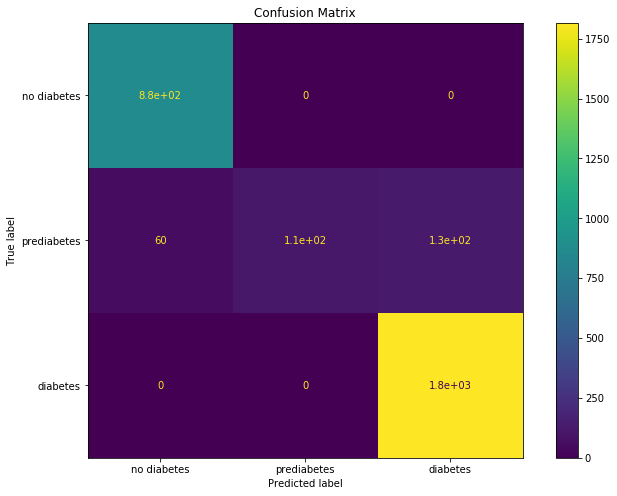

In [136]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


logreg = LogisticRegression(multi_class='ovr', solver='liblinear').fit(X_train, y_train)
print(logreg.score(X_test, y_test)*100)


y_preds = logreg.predict(X_test)
print(y_preds)


cf_matrix = confusion_matrix(y_test, y_preds)
print(cf_matrix)

#Creating matplotlib axes object to assign figuresize and figure title
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Confusion Matrix')

disp =metrics.plot_confusion_matrix(logreg, X_test, y_test, display_labels= ["no diabetes", "prediabetes", "diabetes"], ax = ax)
disp.confusion_matrix

In [125]:
logreg.predict([[190, True]])

array([2], dtype=int64)

## SVM

97.23333333333333
[1 2 2 ... 2 1 2]
[[ 879    0    0]
 [  24  222   59]
 [   0    0 1816]]


array([[ 879,    0,    0],
       [  24,  222,   59],
       [   0,    0, 1816]], dtype=int64)

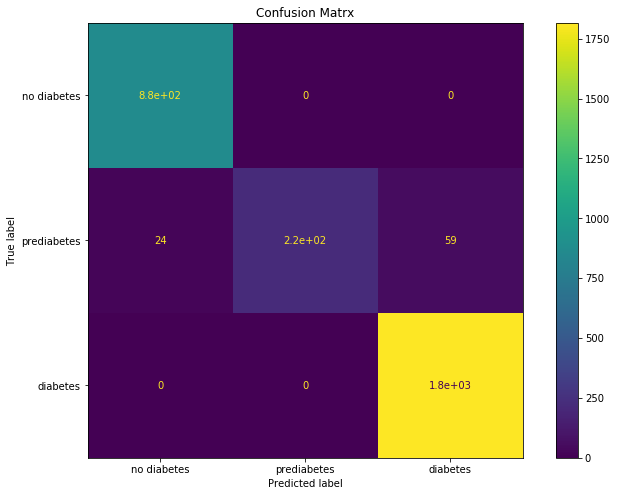

In [135]:
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(SVC(kernel = 'linear', C = 1)).fit(X_train, y_train)

y_preds = clf.predict(X_test)

print(clf.score(X_test, y_test)*100)
print(y_preds)

cf_matrix = confusion_matrix(y_test, y_preds)
print(cf_matrix)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(clf, X_test, y_test, display_labels= ["no diabetes", "prediabetes", "diabetes"], ax = ax)
disp.confusion_matrix

In [121]:
clf.predict([[100,True], [130,True], [200, True]])

array([0, 0, 2], dtype=int64)

## KNN

1.0


array([[ 879,    0,    0],
       [   0,  305,    0],
       [   0,    0, 1816]], dtype=int64)

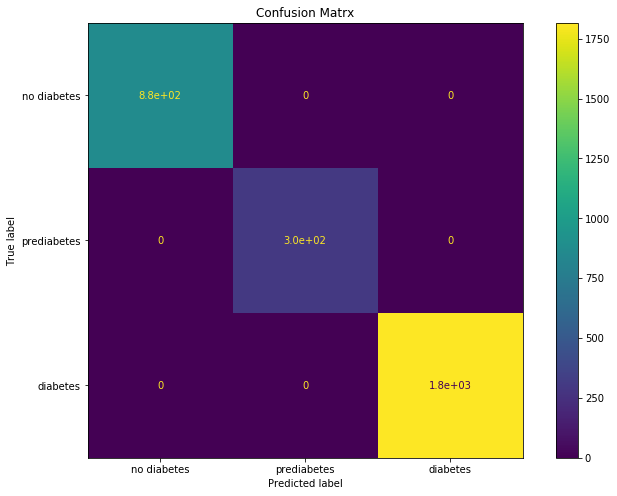

In [143]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train) 
  
accuracy = knn.score(X_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(knn, X_test, y_test, display_labels= ["no diabetes", "prediabetes", "diabetes"], ax = ax)
disp.confusion_matrix


# Bronchiectasis Prediction Model

[0 0 1 ... 0 0 0]
[[2585   55]
 [ 284   76]]


array([[2585,   55],
       [ 284,   76]], dtype=int64)

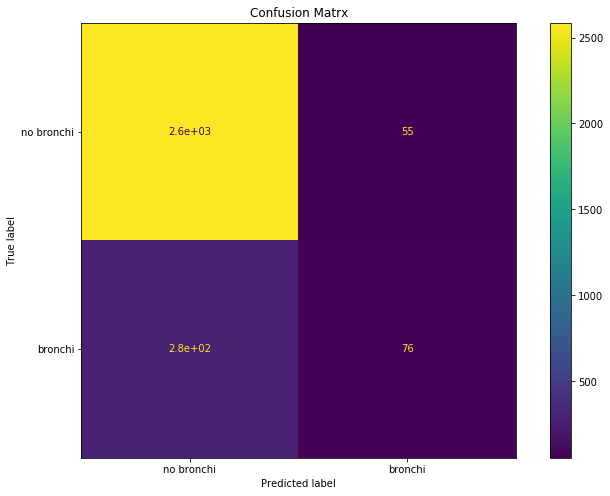

In [150]:
from sklearn import linear_model
X = df[['breaths_per_minute', 'breath_shortness_severity', 'cough_frequency','cough_severity']]
Y = df['bronchiectasis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

log_regr = linear_model.LogisticRegression(max_iter = 1000)
log_regr.fit(X_train, y_train)

log_regr.score(X_test, y_test)

y_preds = log_regr.predict(X_test)
print(y_preds)

cf_matrix = confusion_matrix(y_test, y_preds)
print(cf_matrix)

group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(log_regr, X_test, y_test, display_labels= ["no bronchi", "bronchi"], ax = ax)
disp.confusion_matrix


97.7
[1 0 1 ... 0 0 0]
[[2621   19]
 [  50  310]]


array([[2621,   19],
       [  50,  310]], dtype=int64)

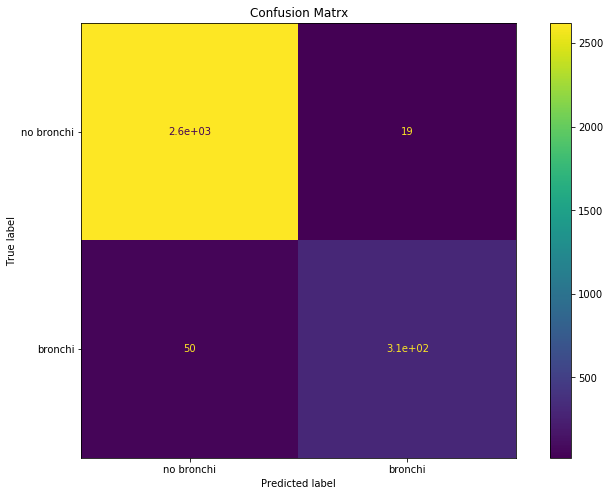

In [152]:

clf = SVC().fit(X_train, y_train)

y_preds = clf.predict(X_test)

print(clf.score(X_test, y_test)*100)
print(y_preds)

cf_matrix = confusion_matrix(y_test, y_preds)
print(cf_matrix)

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(clf, X_test, y_test, display_labels= ["no bronchi", "bronchi"], ax = ax)
disp.confusion_matrix

0.981


array([[2628,   12],
       [  45,  315]], dtype=int64)

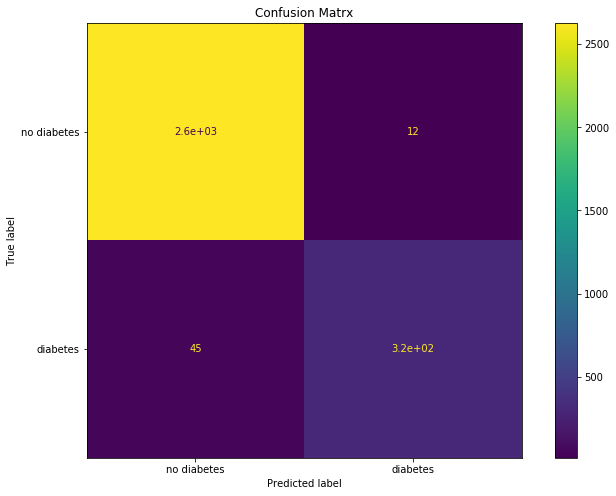

In [154]:
knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train) 
  
accuracy = knn.score(X_test, y_test) 
print (accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(knn, X_test, y_test, display_labels= ["no bronchi", "bronchi"], ax = ax)
disp.confusion_matrix

# Hypoxemia

In [155]:
X = df[['oxygen_saturation']]
Y = df['hypoxemia']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


[0 0 1 ... 0 0 0]
[[2585   55]
 [ 284   76]]


array([[2585,   55],
       [ 284,   76]], dtype=int64)

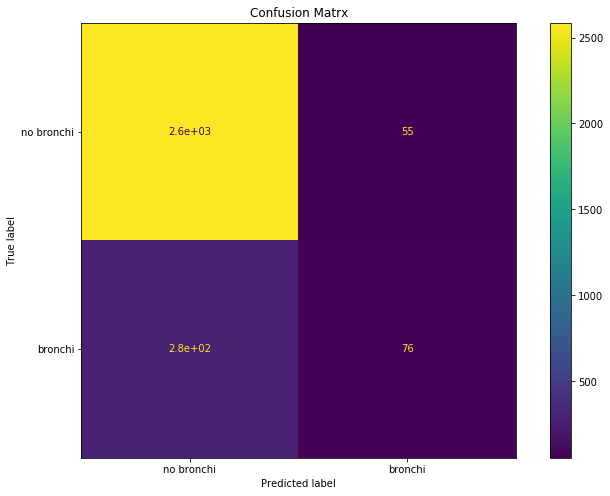

In [156]:
log_regr = linear_model.LogisticRegression(max_iter = 1000)
log_regr.fit(X_train, y_train)

log_regr.score(X_test, y_test)

y_preds = log_regr.predict(X_test)
print(y_preds)

cf_matrix = confusion_matrix(y_test, y_preds)
print(cf_matrix)

group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_title('Confusion Matrx')

disp =metrics.plot_confusion_matrix(log_regr, X_test, y_test, display_labels= ["no bronchi", "bronchi"], ax = ax)
disp.confusion_matrix